In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 266kB 8.5MB/s 
     |████████████████████████████████| 13.9MB 318kB/s 
     |████████████████████████████████| 66.2MB 55kB/s 
     |████████████████████████████████| 174kB 44.4MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 266kB 42.2MB/s 
     |████████████████████████████████| 6.8MB 39.0MB/s 
     |████████████████████████████████| 1.8MB 48.4MB/s 
     |████████████████████████████████| 1.6MB 37.1MB/s 
     |████████████████████████████████| 6.0MB 39.3MB/s 
     |████████████████████████████████| 153kB 41.6MB/s 
     |████████████████████████████████| 327kB 41.3MB/s 
     |████████████████████████████████| 1.1MB 45.4MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 163kB 46.8MB/s 
     |████████████████████████████████| 2.1MB 44.4MB/s 

In [3]:
!pip install streamlit

     |████████████████████████████████| 7.4MB 2.7MB/s 
     |████████████████████████████████| 112kB 46.3MB/s 
     |████████████████████████████████| 133kB 45.2MB/s 
     |████████████████████████████████| 4.4MB 50.3MB/s 
     |████████████████████████████████| 6.7MB 46.7MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 122kB 47.5MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=ac89541fe67855abc578e59ea26adf64248c1bb4ac580a2dce28dcb0f356fc66
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=5808ca70cca3e163c6603f51cd66c01ffd69eb15f1c16ed2c84086c2c90795cd
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: fil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/My Drive/StreamLitPycaret/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from pycaret.regression import *

In [6]:
r2 = setup(df, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,2752.5823,24064751.6470,4887.6642,0.8301,0.4511,0.3217,0.1469
1,Bayesian Ridge,2992.5766,24711189.9575,4955.7234,0.8253,0.4338,0.3210,0.0121
2,Ridge Regression,2987.6187,24731326.9459,4957.7281,0.8252,0.4351,0.3202,0.0055
3,Gradient Boosting Regressor,2802.3369,24902208.0144,4967.5156,0.8248,0.4560,0.3293,0.2966
4,Lasso Regression,2996.8897,24915831.0315,4977.1858,0.8237,0.4378,0.3231,0.0611
5,Linear Regression,3007.2507,24974259.7899,4982.6472,0.8232,0.4395,0.3254,0.0126
6,TheilSen Regressor,2919.2876,25284373.2719,5007.5537,0.8225,0.4377,0.2915,10.5586
7,Orthogonal Matching Pursuit,3053.2509,25854729.5475,5066.5096,0.8184,0.4297,0.3251,0.0065
8,Huber Regressor,1992.3675,26283569.6687,5107.0520,0.8153,0.3973,0.0834,0.0850
9,Lasso Least Angle Regression,3176.7041,26318250.4721,5119.8193,0.8137,0.4814,0.3999,0.0166


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [13]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3056.9882,25557464.1374,5055.4391,0.8474,0.5024,0.3870
1,3083.8323,33919165.8129,5824.0163,0.8028,0.4831,0.3156
2,2824.6330,24530209.1803,4952.7981,0.6894,0.5081,0.3231
3,2925.5783,25462596.8294,5046.0476,0.7874,0.5411,0.4654
4,3262.6346,31879852.9112,5646.2247,0.7629,0.5539,0.3613
5,2875.9084,21896325.0532,4679.3509,0.8591,0.3819,0.2908
6,2587.6205,22433165.7293,4736.3663,0.8474,0.4089,0.3211
7,2923.9223,27695508.5137,5262.6522,0.8477,0.4708,0.2883
8,2535.9976,21457110.3770,4632.1820,0.8614,0.4688,0.3829
9,2787.8877,28651736.5353,5352.7317,0.8155,0.4940,0.3294


In [16]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2647.7135,19807966.7874,4450.6142,0.8817,0.4082,0.3034
1,3005.7041,31086773.8168,5575.5514,0.8193,0.4522,0.3044
2,2506.4744,20432727.3061,4520.2574,0.7413,0.4664,0.2945
3,2577.1344,19553319.9414,4421.9136,0.8367,0.4372,0.3352
4,2862.3116,26508570.3086,5148.6474,0.8028,0.4789,0.2703
5,2601.4645,18059917.2937,4249.6961,0.8838,0.3569,0.2670
6,2410.3542,18313271.9625,4279.4009,0.8754,0.3739,0.3018
7,2555.1623,23228425.2469,4819.5877,0.8723,0.4349,0.2475
8,2435.6777,20095577.4594,4482.8091,0.8702,0.4412,0.3438
9,2528.6631,23406147.4911,4837.9900,0.8492,0.4365,0.2973


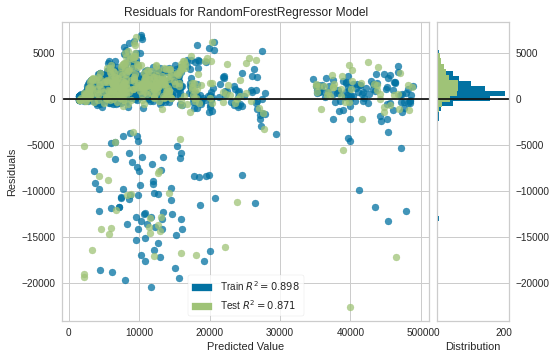

In [17]:
plot_model(tuned_model)

In [19]:
!pip install shap

     |████████████████████████████████| 327kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456465 sha256=f92cc6cf7a25db7ff54c2d02bcea0152de6d00ce25178a1309abe7bee6e87639
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


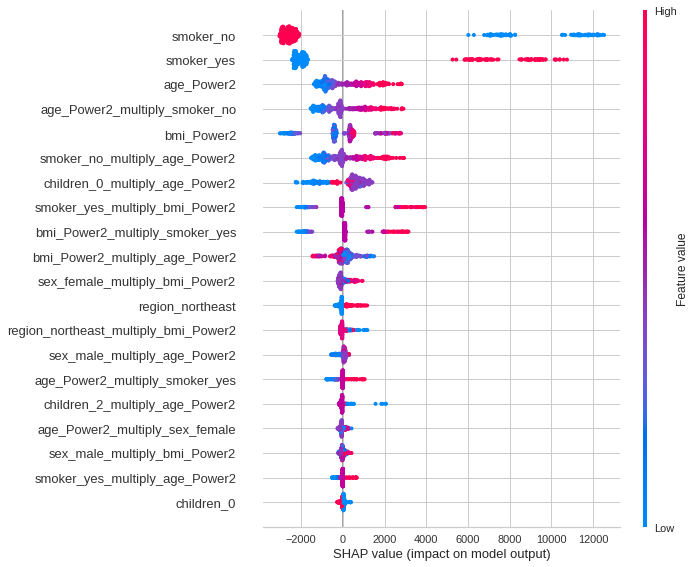

In [20]:
interpret_model(tuned_model)

In [21]:
predictions = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2562.1941,1.837592e+07,4286.7149,0.8714,0.4234,0.3131


In [22]:
finalize_model(tuned_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [23]:
save_model(tuned_model, 'insurance_rf')

Transformation Pipeline and Model Succesfully Saved
